<a href="https://colab.research.google.com/github/drpetros11111/DeepUnderstanding_DL/blob/Softmax/DUDL_math_softmax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COURSE: A deep understanding of deep learning
## SECTION: Math prerequisites
### LECTURE: Softmax
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202401

In [1]:
# import libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
# "manually" in numpy

# the list of numbers
z = [1,2,3]

# compute the softmax result
num = np.exp(z)
den = np.sum( np.exp(z) )
sigma = num / den

print(sigma)
print(np.sum(sigma))

[0.09003057 0.24472847 0.66524096]
1.0


# Softmax Mathematics

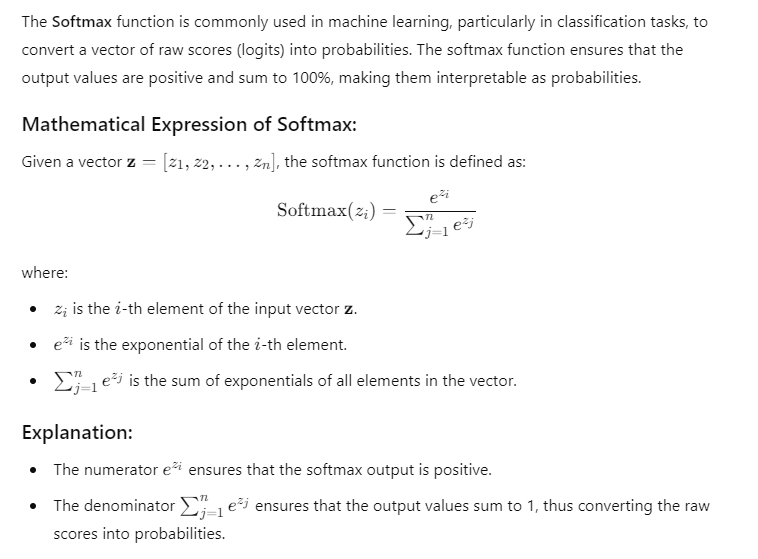

---------------------------
#Example

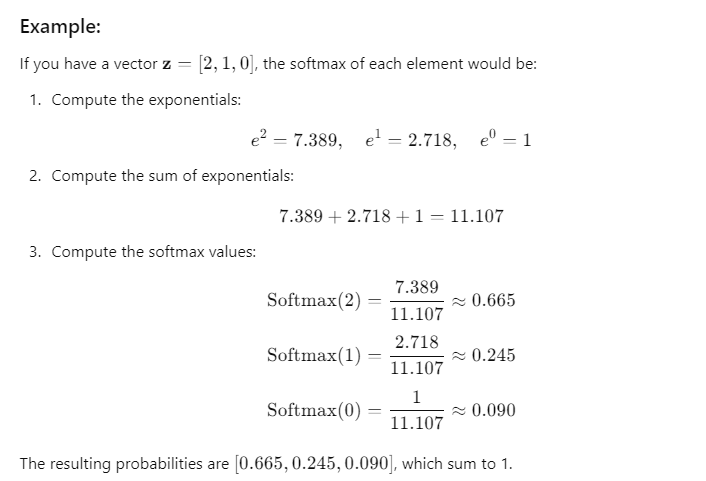

------------------
#Properties

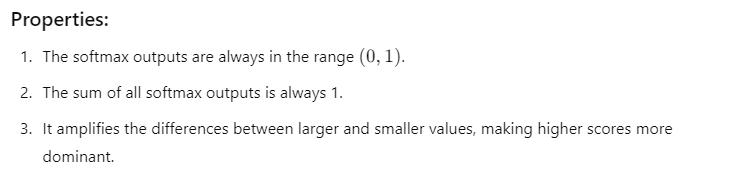




[14 12 -1 -3  8  7  4  3 -5  7  4 -1 13  6  3  2  2  8  1  0 -5 -1  8  4
  3]


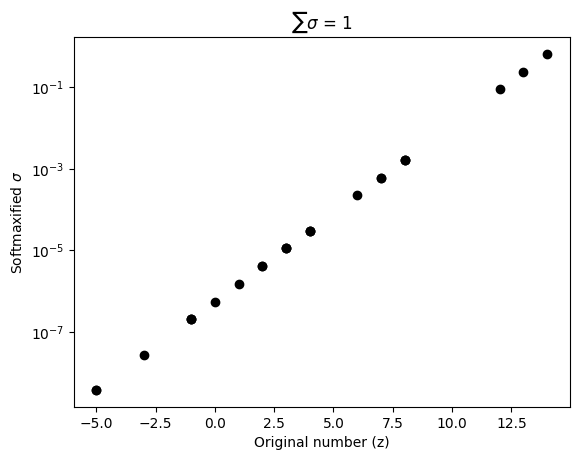

In [3]:
# repeat with some random integers
z = np.random.randint(-5,high=15,size=25)
print(z)

# compute the softmax result
num = np.exp(z)
den = np.sum( num )
sigma = num / den

# compare
plt.plot(z,sigma,'ko')
plt.xlabel('Original number (z)')
plt.ylabel('Softmaxified $\sigma$')
plt.yscale('log')
plt.title('$\sum\sigma$ = %g' %np.sum(sigma))
plt.show()

# Explanation of Each Step:

-----------------------
## Generate Random Integers:

    z = np.random.randint(-5, high=15, size=25)
    print(z)

This generates an array z of 25 random integers between -5 and 15. The array is printed so you can see the original values.

---------------------
#Example output for z:

    [ 7, -3, 10, 12, 3, -4, 9, 8, -5, 11, 0, -2, 6, 4, 5, 1, 13, 14, 15, -1, 2, -5, 9, 0, 8]

##Compute the Softmax Results:

    num = np.exp(z)
    den = np.sum(num)
    sigma = num / den

##num = np.exp(z):

The exponential of each element in z is calculated. Since the softmax function applies the exponential to each input element, this step computes the numerator for each element.

##den = np.sum(num):

The sum of all exponentials (denominator of the softmax formula).

##sigma = num / den:

This performs the element-wise division of the exponential values by the sum of the exponentials, which produces the softmax values (sigma).

These values represent probabilities, where larger input values lead to higher softmax values.

--------
#Plotting the Softmax Values:

    plt.plot(z, sigma, 'ko')
    plt.xlabel('Original number (z)')
    plt.ylabel('Softmaxified $\sigma$')
    plt.yscale('log')
    plt.title('$\sum\sigma$ = %g' %np.sum(sigma))
    plt.show()

This part of the code plots the original values z (on the x-axis) against their corresponding softmax values sigma (on the y-axis).

##plt.yscale('log'):

The y-axis is set to a logarithmic scale, which helps better visualize differences in probabilities since softmax tends to produce very small values for low z values and large values for higher z.

The plot shows how each original number maps to its "softmaxified" probability, where larger values of z result in much larger probabilities, and smaller values of z result in much smaller probabilities.

##The title shows the sum of the softmax probabilities, which should always be 1:
    $\sum\sigma$ = 1

------------------------
#Summary
Softmax Function: Converts raw values (integers z) into probabilities sigma, where larger values get higher probabilities.

Visualization: The plot shows the relationship between the original numbers z and their corresponding probabilities sigma, using a logarithmic scale for better visualization of the range of probabilities.

Exponential Scaling: Notice that small differences in the original values lead to large differences in softmax probabilities because of the exponential transformation. This makes softmax sensitive to the relative magnitude of the inputs.

The plot gives a clear visual representation of how the softmax function transforms the original integers into probabilities that sum to 1.








# Using pytorch

# Using Tensorflow

In [4]:
import tensorflow as tf
import numpy as np

# The list of numbers
z = [1, 2, 3]

# Manually compute the softmax result using TensorFlow
z_tf = tf.constant(z, dtype=tf.float32)  # Convert list to TensorFlow constant
num = tf.exp(z_tf)  # Exponential of each element
den = tf.reduce_sum(tf.exp(z_tf))  # Sum of exponentials
sigma_manual = num / den  # Element-wise division

# Using TensorFlow's built-in softmax function
sigma_tf = tf.nn.softmax(z_tf)

# Print the results
print("Manually computed softmax:", sigma_manual.numpy())  # Convert tensor to NumPy array and print
print("Sum of manually computed softmax:", tf.reduce_sum(sigma_manual).numpy())  # Sum of manual softmax
print("Softmax using tf.nn.softmax:", sigma_tf.numpy())  # Print the result of TensorFlow's softmax function
print("Sum of tf.nn.softmax:", tf.reduce_sum(sigma_tf).numpy())  # Sum of softmax using tf.nn.softmax


Manually computed softmax: [0.09003057 0.24472848 0.66524094]
Sum of manually computed softmax: 1.0
Softmax using tf.nn.softmax: [0.09003057 0.24472848 0.66524094]
Sum of tf.nn.softmax: 1.0


# Manually Computing the Softmax:

---------------------------
##z_tf = tf.constant(z, dtype=tf.float32):

Converts the Python list z into a TensorFlow constant with float32 precision.

##num = tf.exp(z_tf):

Applies the exponential function to each element of z_tf. The exponential is a crucial step in softmax because it magnifies the differences between larger and smaller numbers.

tf.exp(z_tf) calculates the exponential of each element in the tensor z_tf, and it uses Euler's number (e ≈ 2.718) as the base of the exponentiation. In mathematical terms:

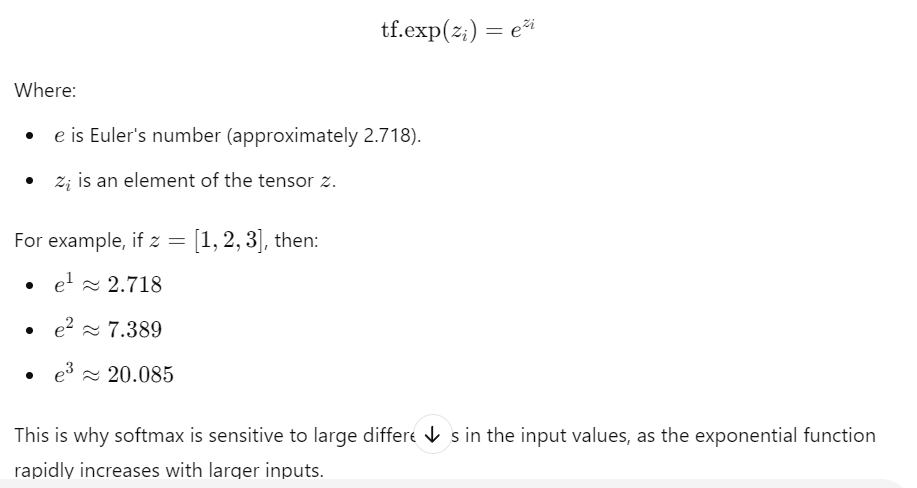

##den = tf.reduce_sum(tf.exp(z_tf)):

Sums all the exponentiated values to create the denominator.

This is the total of the exponentials, ensuring that the softmax probabilities will sum to 1.

---------------------
##sigma_manual = num / den:

Element-wise division of the exponentials by the sum of exponentials, producing the softmax probabilities.

-----------------------
##Using TensorFlow's Built-in Softmax:

    sigma_tf = tf.nn.softmax(z_tf):

TensorFlow provides a built-in softmax function, which simplifies the process.

This function automatically handles the exponentiation, summing, and division.

----------------------------
##Printing Results:

sigma_manual.numpy(): Converts the manually computed softmax tensor back into a NumPy array for easy reading.

tf.reduce_sum(sigma_manual).numpy(): Verifies that the manually computed softmax values sum to 1.

sigma_tf.numpy(): Displays the result of TensorFlow's built-in softmax function.

tf.reduce_sum(sigma_tf).numpy(): Verifies that the softmax values computed by tf.nn.softmax also sum to 1, as expected.

------------------
##Key Points:
Both manual and TensorFlow's built-in approaches give the same result.

The softmax function converts raw scores into probabilities by applying an exponential function and normalizing them to ensure they sum to 1.

Using tf.nn.softmax is simpler and more efficient, but manually computing softmax helps illustrate how the process works under the hood.







[10  2 -3 -1  7  8  7 14  2  4  6 -5 13  5 10  8  0  3  1 -3 -3 -1 -5 11
 -5]


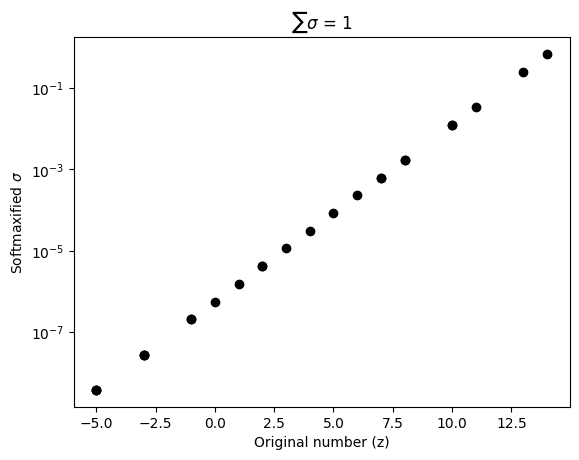

In [7]:
# repeat with some random integers
z = np.random.randint(-5,high=15,size=25)
print(z)

# compute the softmax result
num = np.exp(z)
den = np.sum( num )
sigma = num / den

# compare
plt.plot(z,sigma,'ko')
plt.xlabel('Original number (z)')
plt.ylabel('Softmaxified $\sigma$')
plt.yscale('log')
plt.title('$\sum\sigma$ = %g' %np.sum(sigma))
plt.show()

In [8]:
# slightly more involved using torch.nn

# create an instance of the softmax activation class
softfun = nn.Softmax(dim=0)

# then apply the data to that function
sigmaT = softfun( torch.Tensor(z) )

# now we get the results
print(sigmaT)

tensor([1.2531e-02, 4.2037e-06, 2.8324e-08, 2.0929e-07, 6.2389e-04, 1.6959e-03,
        6.2389e-04, 6.8417e-01, 4.2037e-06, 3.1061e-05, 2.2951e-04, 3.8333e-09,
        2.5169e-01, 8.4434e-05, 1.2531e-02, 1.6959e-03, 5.6891e-07, 1.1427e-05,
        1.5465e-06, 2.8324e-08, 2.8324e-08, 2.0929e-07, 3.8333e-09, 3.4063e-02,
        3.8333e-09])


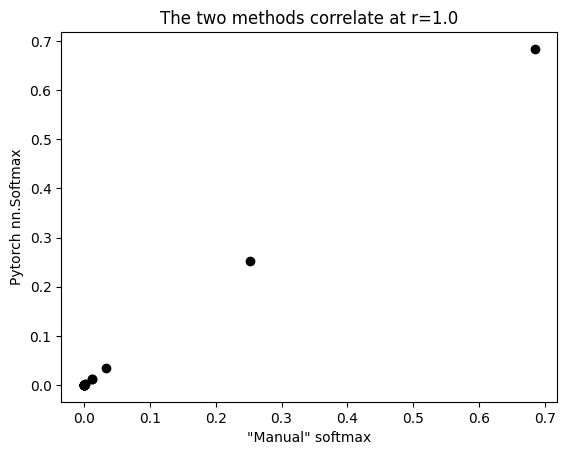

In [9]:
# show that they are the same
plt.plot(sigma,sigmaT,'ko')
plt.xlabel('"Manual" softmax')
plt.ylabel('Pytorch nn.Softmax')
plt.title(f'The two methods correlate at r={np.corrcoef(sigma,sigmaT)[0,1]}')
plt.show()